In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
df=pd.read_csv("tea_price_data.csv")
df.head()

,Date,Black,Green,Oolong,White,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
#getting the shape of the data
df.shape

(2290, 6)

In [4]:
#getting the column names
df.columns

Index(['Date', 'Black', 'Green', 'Oolong', 'White', 'EUR/USD'], dtype='object')

In [5]:
df.head()

,Date,Black,Green,Oolong,White,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.tail()

,Date,Black,Green,Oolong,White,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#checking the null values
df.isna().sum()

Date       0
Black      0
Green      0
Oolong     0
White      0
EUR/USD    0
dtype: int64

In [8]:
#checking for duplicates
df.duplicated().sum()

0

In [9]:
#getting the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   Black    2290 non-null   float64
 2   Green    2290 non-null   float64
 3   Oolong   2290 non-null   float64
 4   White    2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#getting the statistical summary
df.describe()

,Black,Green,Oolong,White,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
#dropping the duplicates
df=df.drop_duplicates()


In [12]:
#checking whether the duplicates  have been dropped
df.duplicated().sum()

0

In [13]:
import warnings 
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [14]:
#getting the value_counts 
df["White"].value_counts()

White
16.150000    11
16.070000     9
15.110000     8
15.910000     8
15.590000     7
             ..
40.580002     1
38.270000     1
33.720001     1
36.980000     1
15.454200     1
Name: count, Length: 1331, dtype: int64

In [15]:
#getting the value_counts 
df["Black"].value_counts()

Black
1447.160034    2
2268.899902    2
2066.659912    2
2095.840088    2
2373.469971    2
              ..
1278.359985    1
1267.640015    1
1265.420044    1
1287.869995    1
2725.780029    1
Name: count, Length: 2277, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

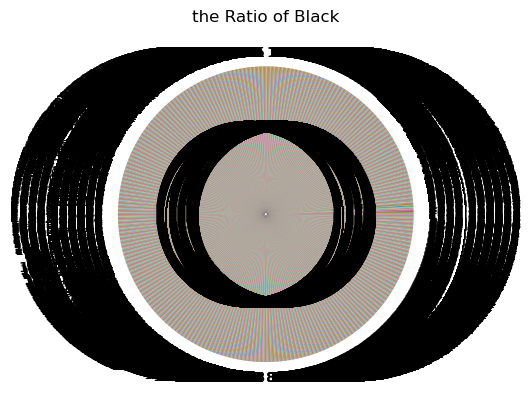

In [16]:
#distribution for target variable(Pyrethrum Daisy)
plt.pie(x = df['Black'].value_counts() ,autopct='%1.2f%%' ,labels=df['Black'].value_counts().index)
plt.title('the Ratio of Black')
plt.show

<Axes: xlabel='White', ylabel='Black'>

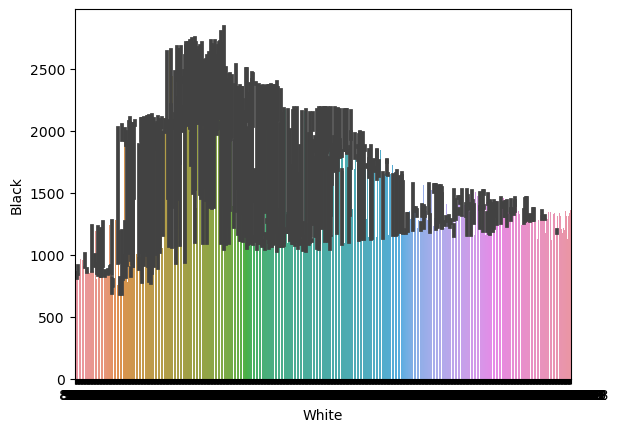

In [17]:
sns.barplot(y="Black",x="White",data=df)

<Axes: xlabel='White', ylabel='Green'>

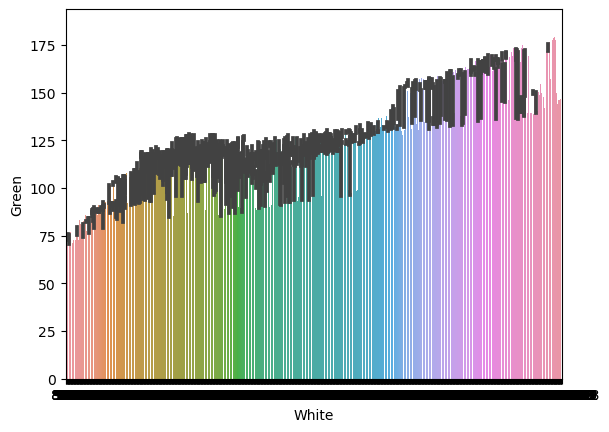

In [18]:
sns.barplot(y="Green",x="White",data=df)

<Axes: xlabel='White', ylabel='Oolong'>

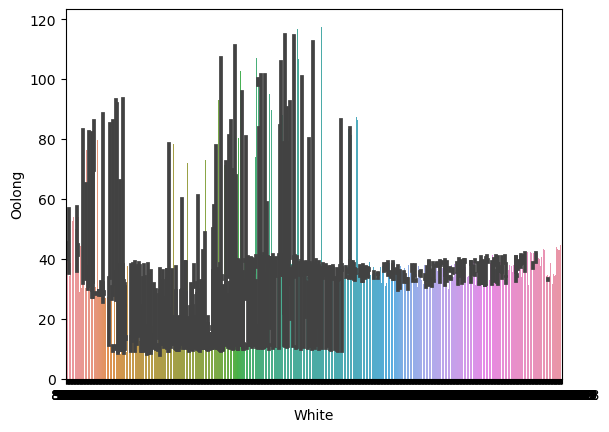

In [19]:
sns.barplot(y="Oolong",x="White",data=df)

<Axes: xlabel='White', ylabel='EUR/USD'>

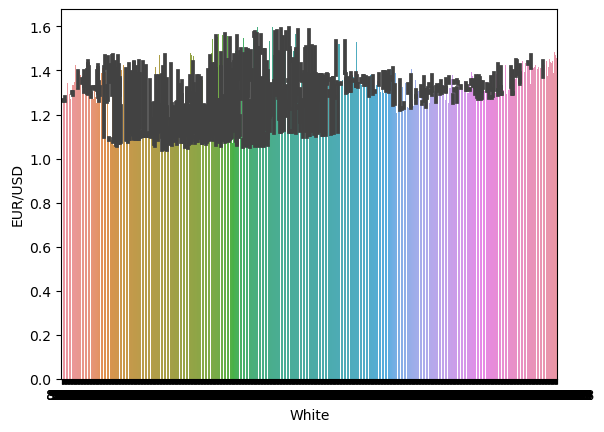

In [20]:
sns.barplot(y="EUR/USD",x="White",data=df)

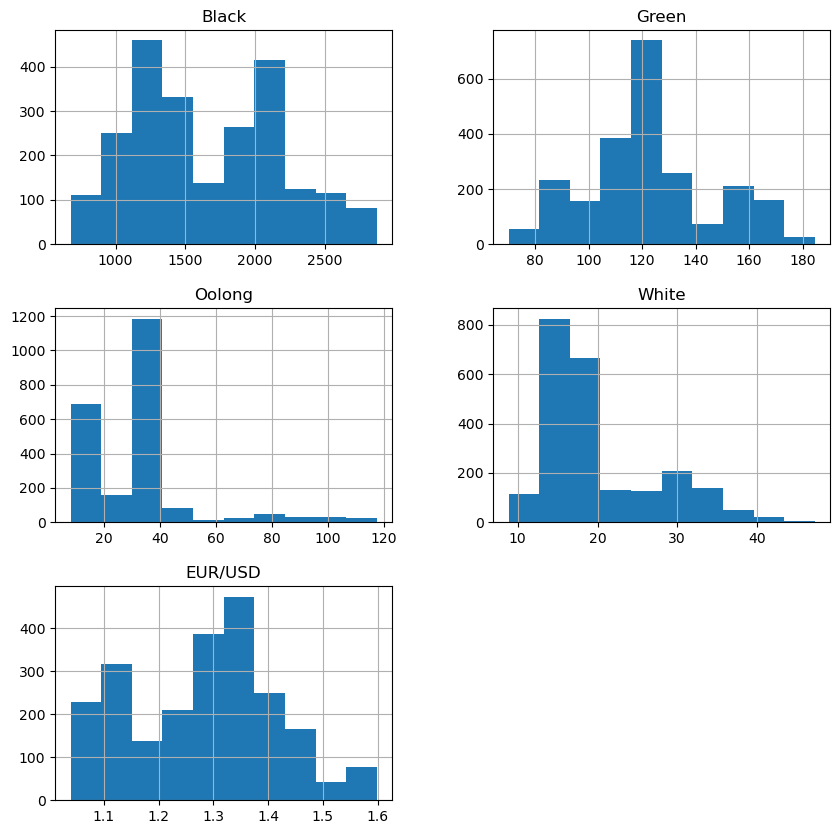

In [21]:
#distribution for all columns in the data 
df.hist(figsize=(10,10),bins=10)
plt.show()

In [22]:
x=df.drop(["Date"],axis=1)
y=df["White"]

In [23]:
x.columns

Index(['Black', 'Green', 'Oolong', 'White', 'EUR/USD'], dtype='object')

In [24]:
print(x.shape)

(2290, 5)


In [25]:
print(y.shape)

(2290,)


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

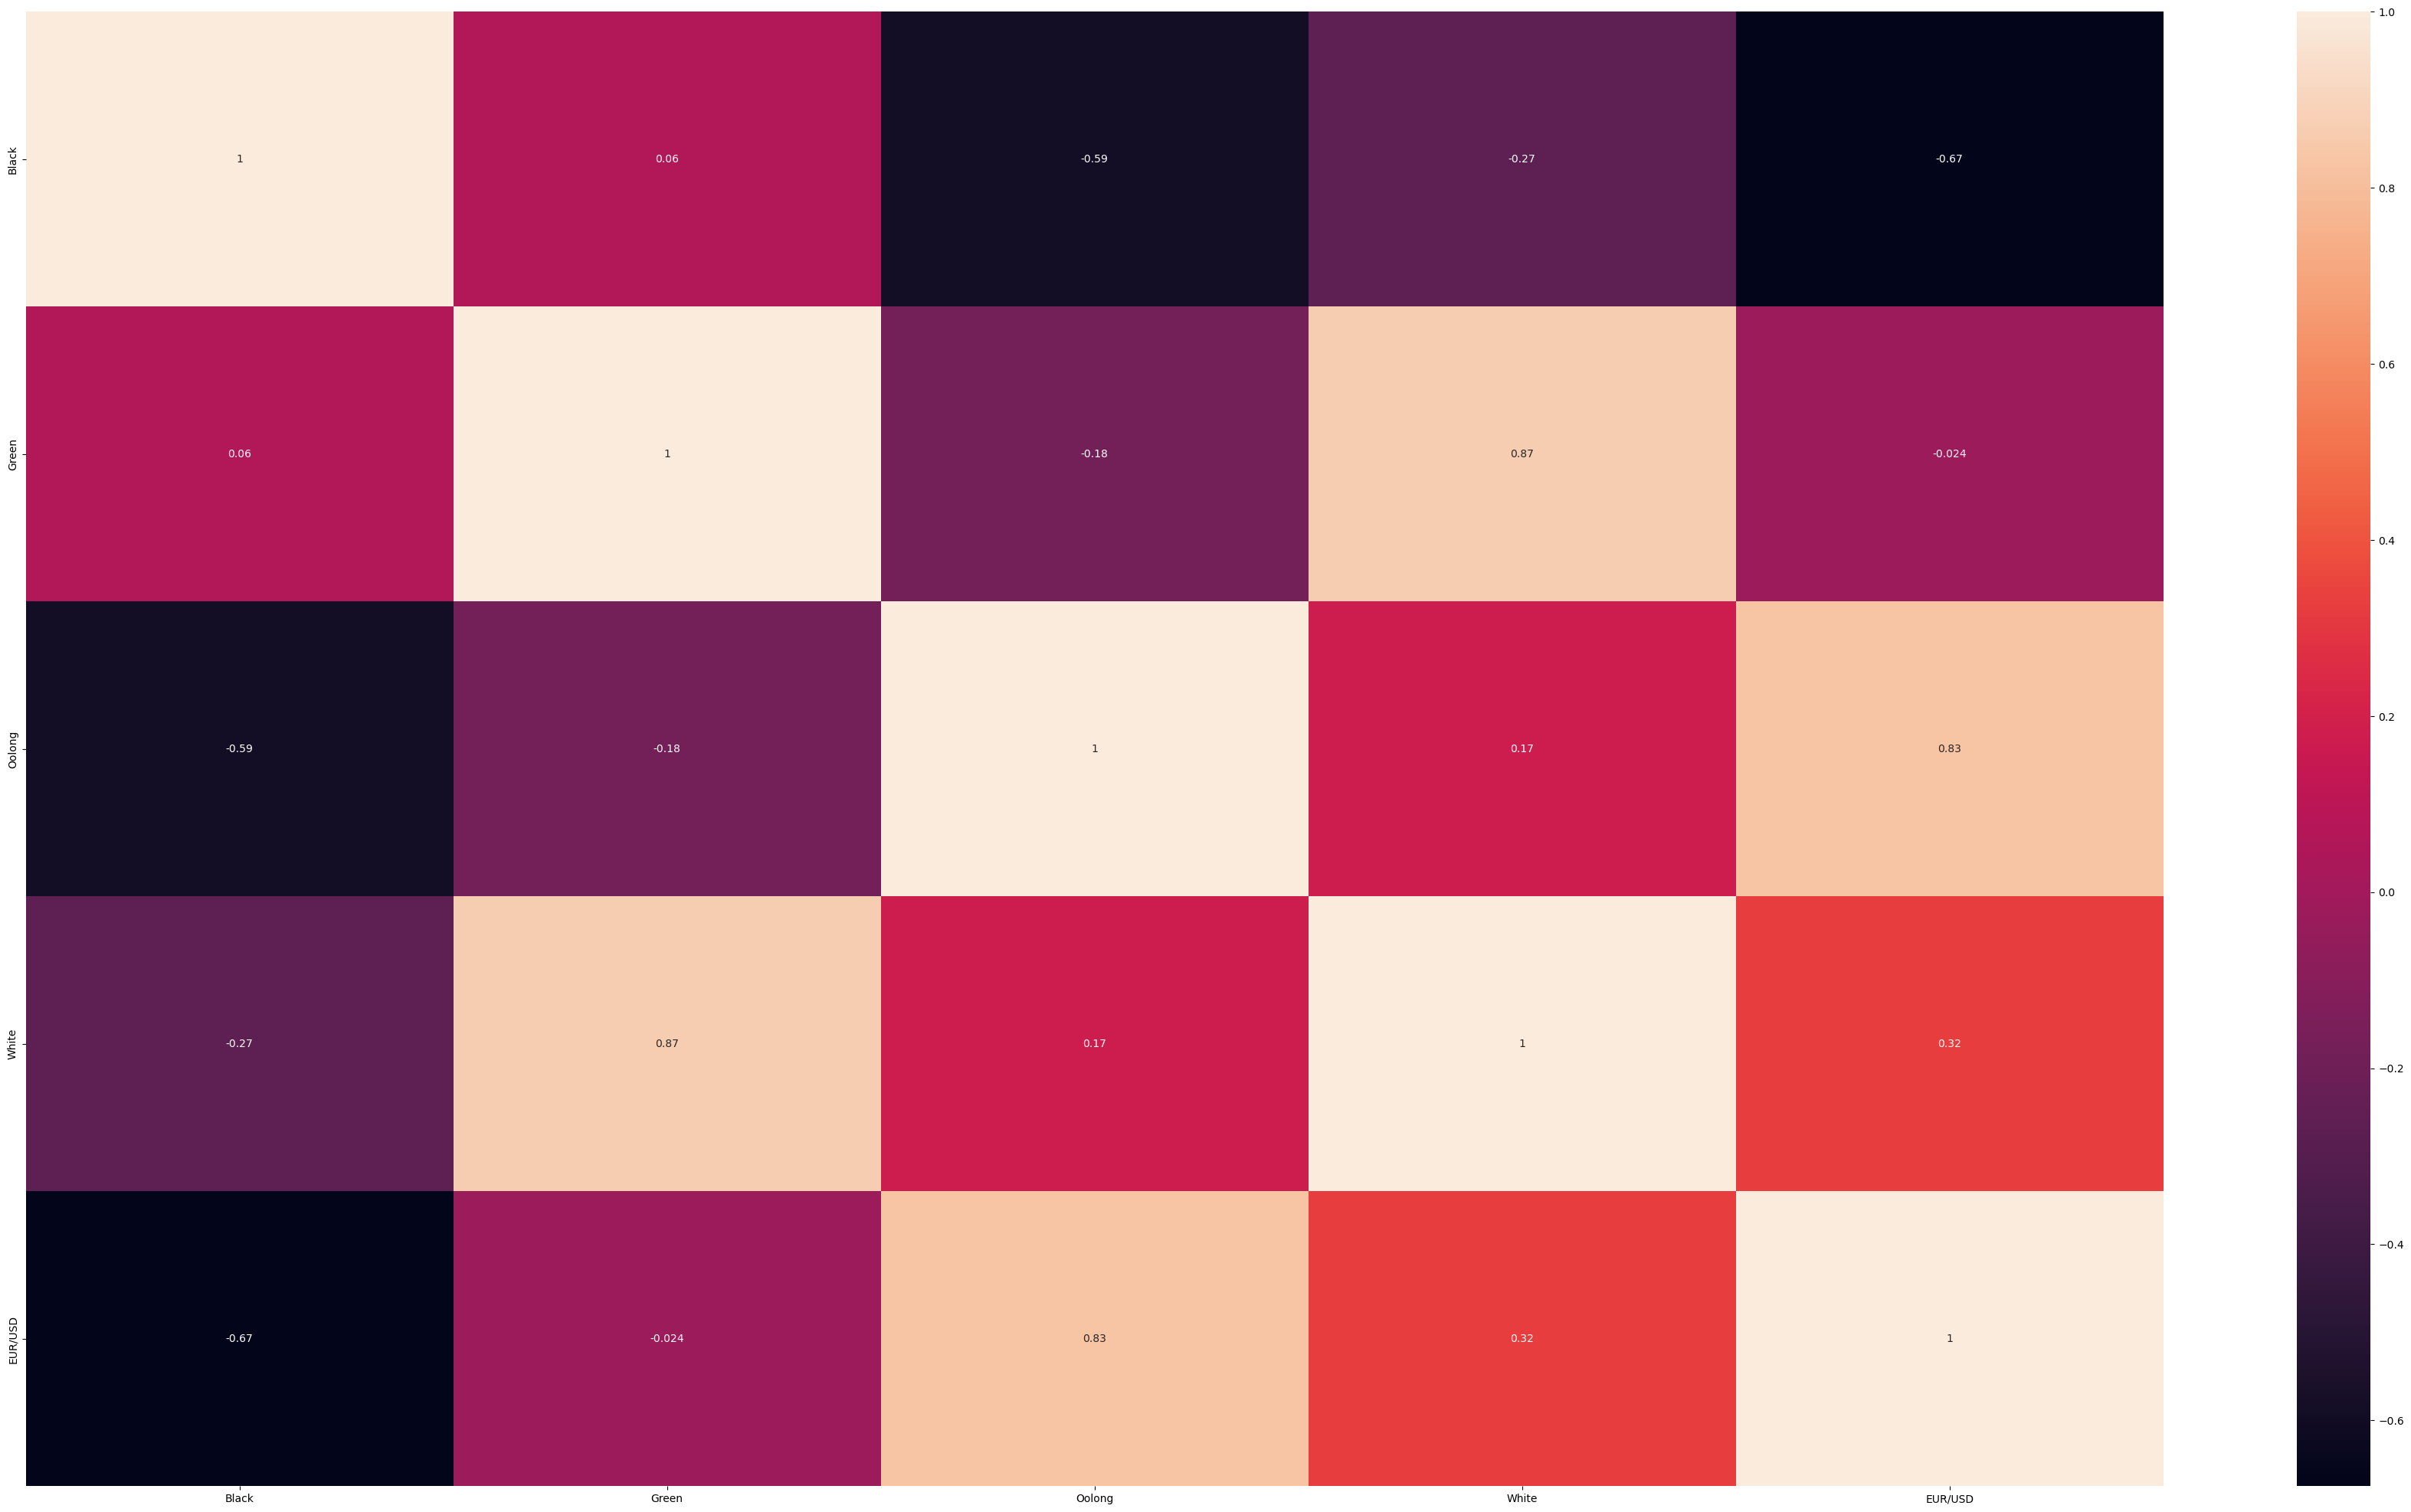

In [27]:
#feature selection with the help of a correlation heatmap where you  remove highly correlated features to reduce multi colinearity
plt.figure(figsize=(45,25))
corr=x_train.corr()
sns.heatmap(corr,annot=True)
plt.show()


In [28]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [29]:
#getting the  highly correlated features witha threshold of 0.6
#correlation between features in your dataset is generally low or if there is no pair of features that meets the specified threshold. I
corr_features=correlation(x_train,0.4)
len(set(corr_features))

2

In [30]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
df = LinearRegression()

# Fit the model
df.fit(x_train, y_train)


LinearRegression()

In [31]:

# rf_classifier = RandomForestClassifier()
# # Fiting  the model on the training data
# rf_classifier.fit(x_train, y_train)
# # Get feature importances from the trained model
# feature_importances = rf_classifier.feature_importances_
# # Creating  a DataFrame to organize feature names and their importance scores
# feature_importance_df = pd.DataFrame({
#     'Feature': x.columns,
#     'Importance': feature_importances
# })
# # Sorting the features by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Calculate importance  percentage
# feature_importance_df['Cumulative Importance'] = np.cumsum(feature_importance_df['Importance'])

# # Filtering features with importance greater than 40%
# selected_features = feature_importance_df[feature_importance_df['Cumulative Importance'] >= 0.4]

# # Storing the selected features in a certain variable (e.g., 'selected_features_variable')
# selected_features_variable = x[selected_features['Feature']]

# # Printing or use the selected features as needed, including their percentage
# print("Selected Features:")
# for index, row in selected_features.iterrows():
#     print(f"{row['Feature']}: {row['Cumulative Importance'] * 100:.2f}%")


In [32]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model
lr.fit(x_train, y_train)

# Predict on the test set
pred=lr.predict(x_test)


In [33]:
from sklearn.metrics import mean_squared_error

# Assuming 'y_test' contains the true continuous values and 'predictions' contains the predicted values
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


NameError: name 'predictions' is not defined

In [34]:
#randomforestclssifier algorithm
rf=RandomForestClassifier()

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model
rf = RandomForestRegressor()

# Fit the model
rf.fit(x_train, y_train)


RandomForestRegressor()

In [36]:
preds=rf.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error

# Assuming 'y_test' contains the true continuous values and 'preds' contains the predicted values
mse = mean_squared_error(y_test, preds)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0011857398884617672


In [38]:
#getting the label for row 5
y_test.iloc[5]

15.99

In [39]:
#getting the features for row 5
x_test.iloc[5]

Black      2673.610107
Green       123.650002
Oolong       12.010000
White        15.990000
EUR/USD       1.194172
Name: 2202, dtype: float64

In [42]:
#checking whether the model works correctly  based on unseen data
input_data=(130.0,214.0,0.0,0.0,168.0)
#changing input data into numpy array
convert=np.asarray(input_data)
#reshaping data as we are predicting the label for one instance
reshaping=convert.reshape(1,-1)
prediction=rf.predict(reshaping)
print(prediction)
if(prediction[0]==1):
    print("you have a tea bonus")
else:
    print(" you dont have tea bonus")

[8.9953]
 you dont have tea bonus


In [43]:
from sklearn.tree import DecisionTreeClassifier

# Example parameters (adjust as needed)
clf = DecisionTreeClassifier(splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)


In [45]:
# Handle missing values, for example by using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)


In [46]:
#converting the notebook to a pickle file
import pickle
with open('heart_attack.pkl', 'wb') as files:
    pickle.dump(rf,files)
    